a) “Exploratory Data Analysis (EDA)”

Demonstrate that the dataset can be read into R.
Clean and wrangle your data into a tidy format.
Plot the relevant raw data, tailoring your plot to address your question.
Make sure to explore the association of the explanatory variables with the response.
Any summary tables that are relevant to your analysis.
Be sure not to print output that takes up a lot of screen space.
Your EDA must be comprehensive with high quality plots.

In [41]:
# imports
library(tidyverse)
library(GGally)
library(repr)
library(broom)
library(leaps)
library(infer)
library(cowplot)
library(broom)
library(car)
library(DHARMa)
library(stats)
library(patchwork)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [42]:
# Main developer: Andrea, Aarya, Ethan, Preran
# read in the data
diabetes_data <- read.csv('data/diabetes.csv')
head(diabetes_data, 6)
# the data is in tidy format already

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [43]:
summary(diabetes_data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [44]:
# Main developer: Andrea, Ethan
# Contributor: Aarya, Preran

outcome_counts = diabetes_data |>
    count(Outcome)
outcome_counts

Outcome,n
<int>,<int>
0,500
1,268


In [45]:
# Main developer: Andrea, Ethan
# Contributor: Aarya, Preran

# summarize the data which may be missing
zero_counts <- sapply(diabetes_data[, -which(names(diabetes_data) == "Outcome")], function(x) sum(x == 0))
zero_counts

Pregnancies                  Glucose            BloodPressure 
                     111                        5                       35 
           SkinThickness                  Insulin                      BMI 
                     227                      374                       11 
DiabetesPedigreeFunction                      Age 
                       0                        0

In [46]:
# need to get rid of the missing values
diabetes_data_clean <- diabetes_data %>%
  select(-SkinThickness) %>% # drop this column because it has too many null values
  filter(Glucose != 0 & BloodPressure != 0 & BMI != 0)

# summarize the new data sizes
dim(diabetes_data_clean) # not too much of a decrease
dim(diabetes_data)

[1] 724   8

[1] 768   9

In [47]:
# Main Contributor: Preran
diabetes_data_clean <- diabetes_data_clean %>%
  mutate(Outcome = as.factor(Outcome))

head(diabetes_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


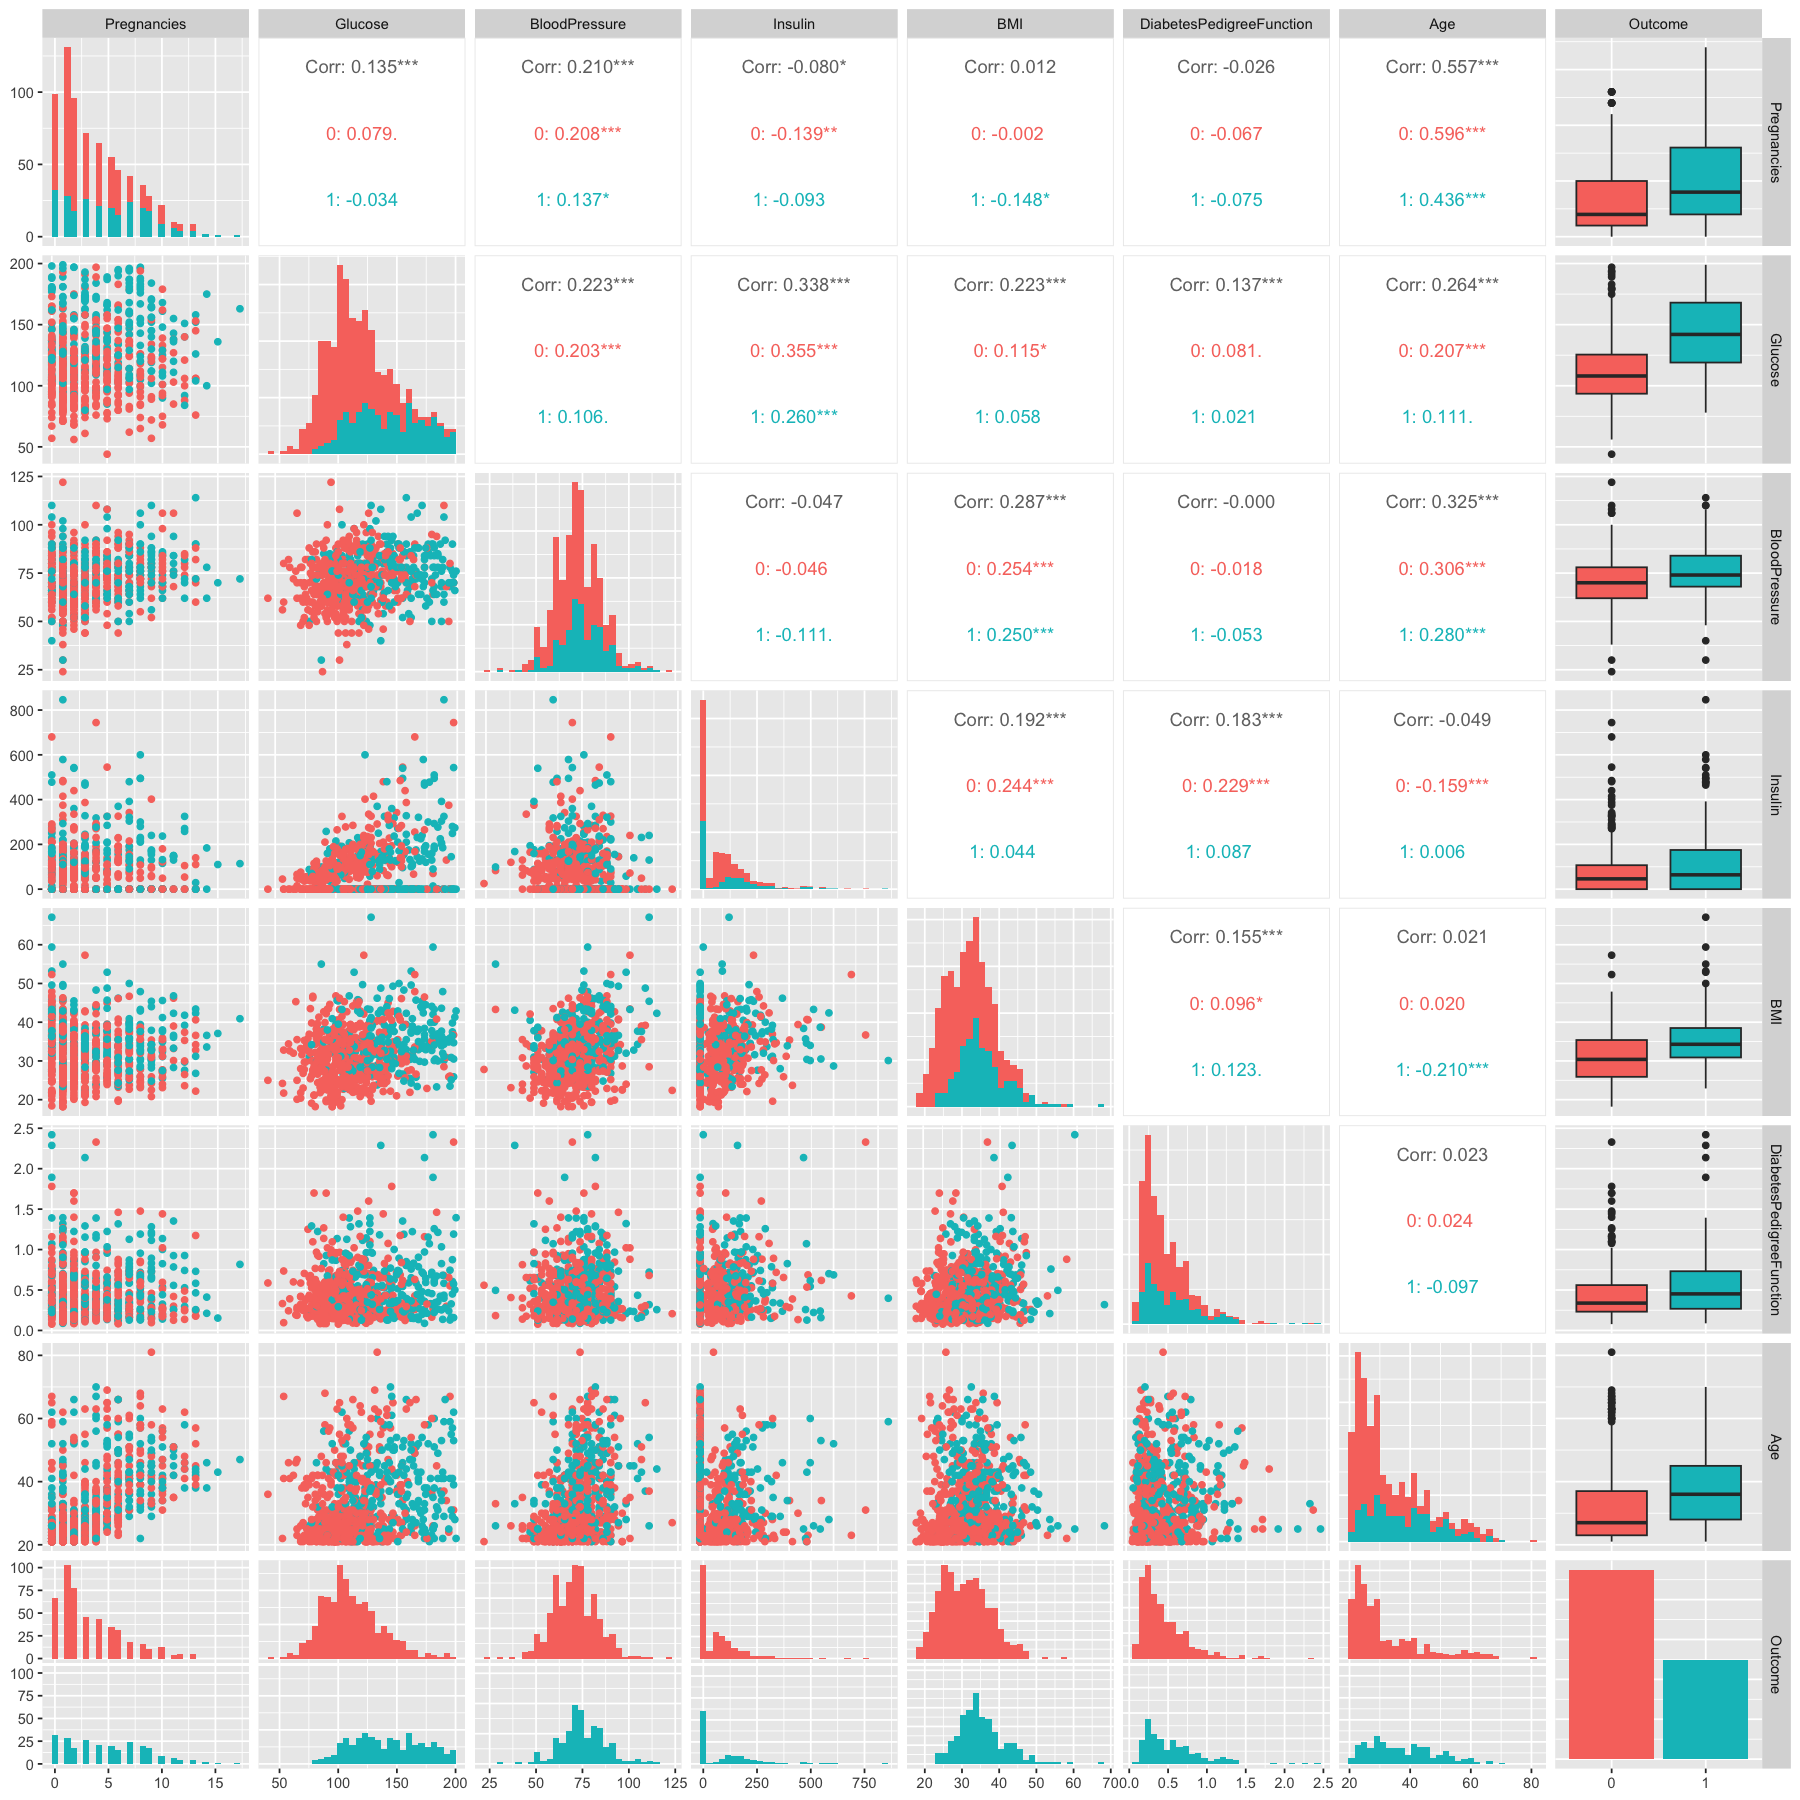

In [48]:
# Main developer: Preran
# Contributor: Ethan, Andrea, Aarya

options(repr.plot.width = 15, repr.plot.height = 15)
ggpairs(diabetes_data_clean, 
        aes(color = factor(Outcome)), 
        diag = list(continuous = wrap("barDiag"))
       )

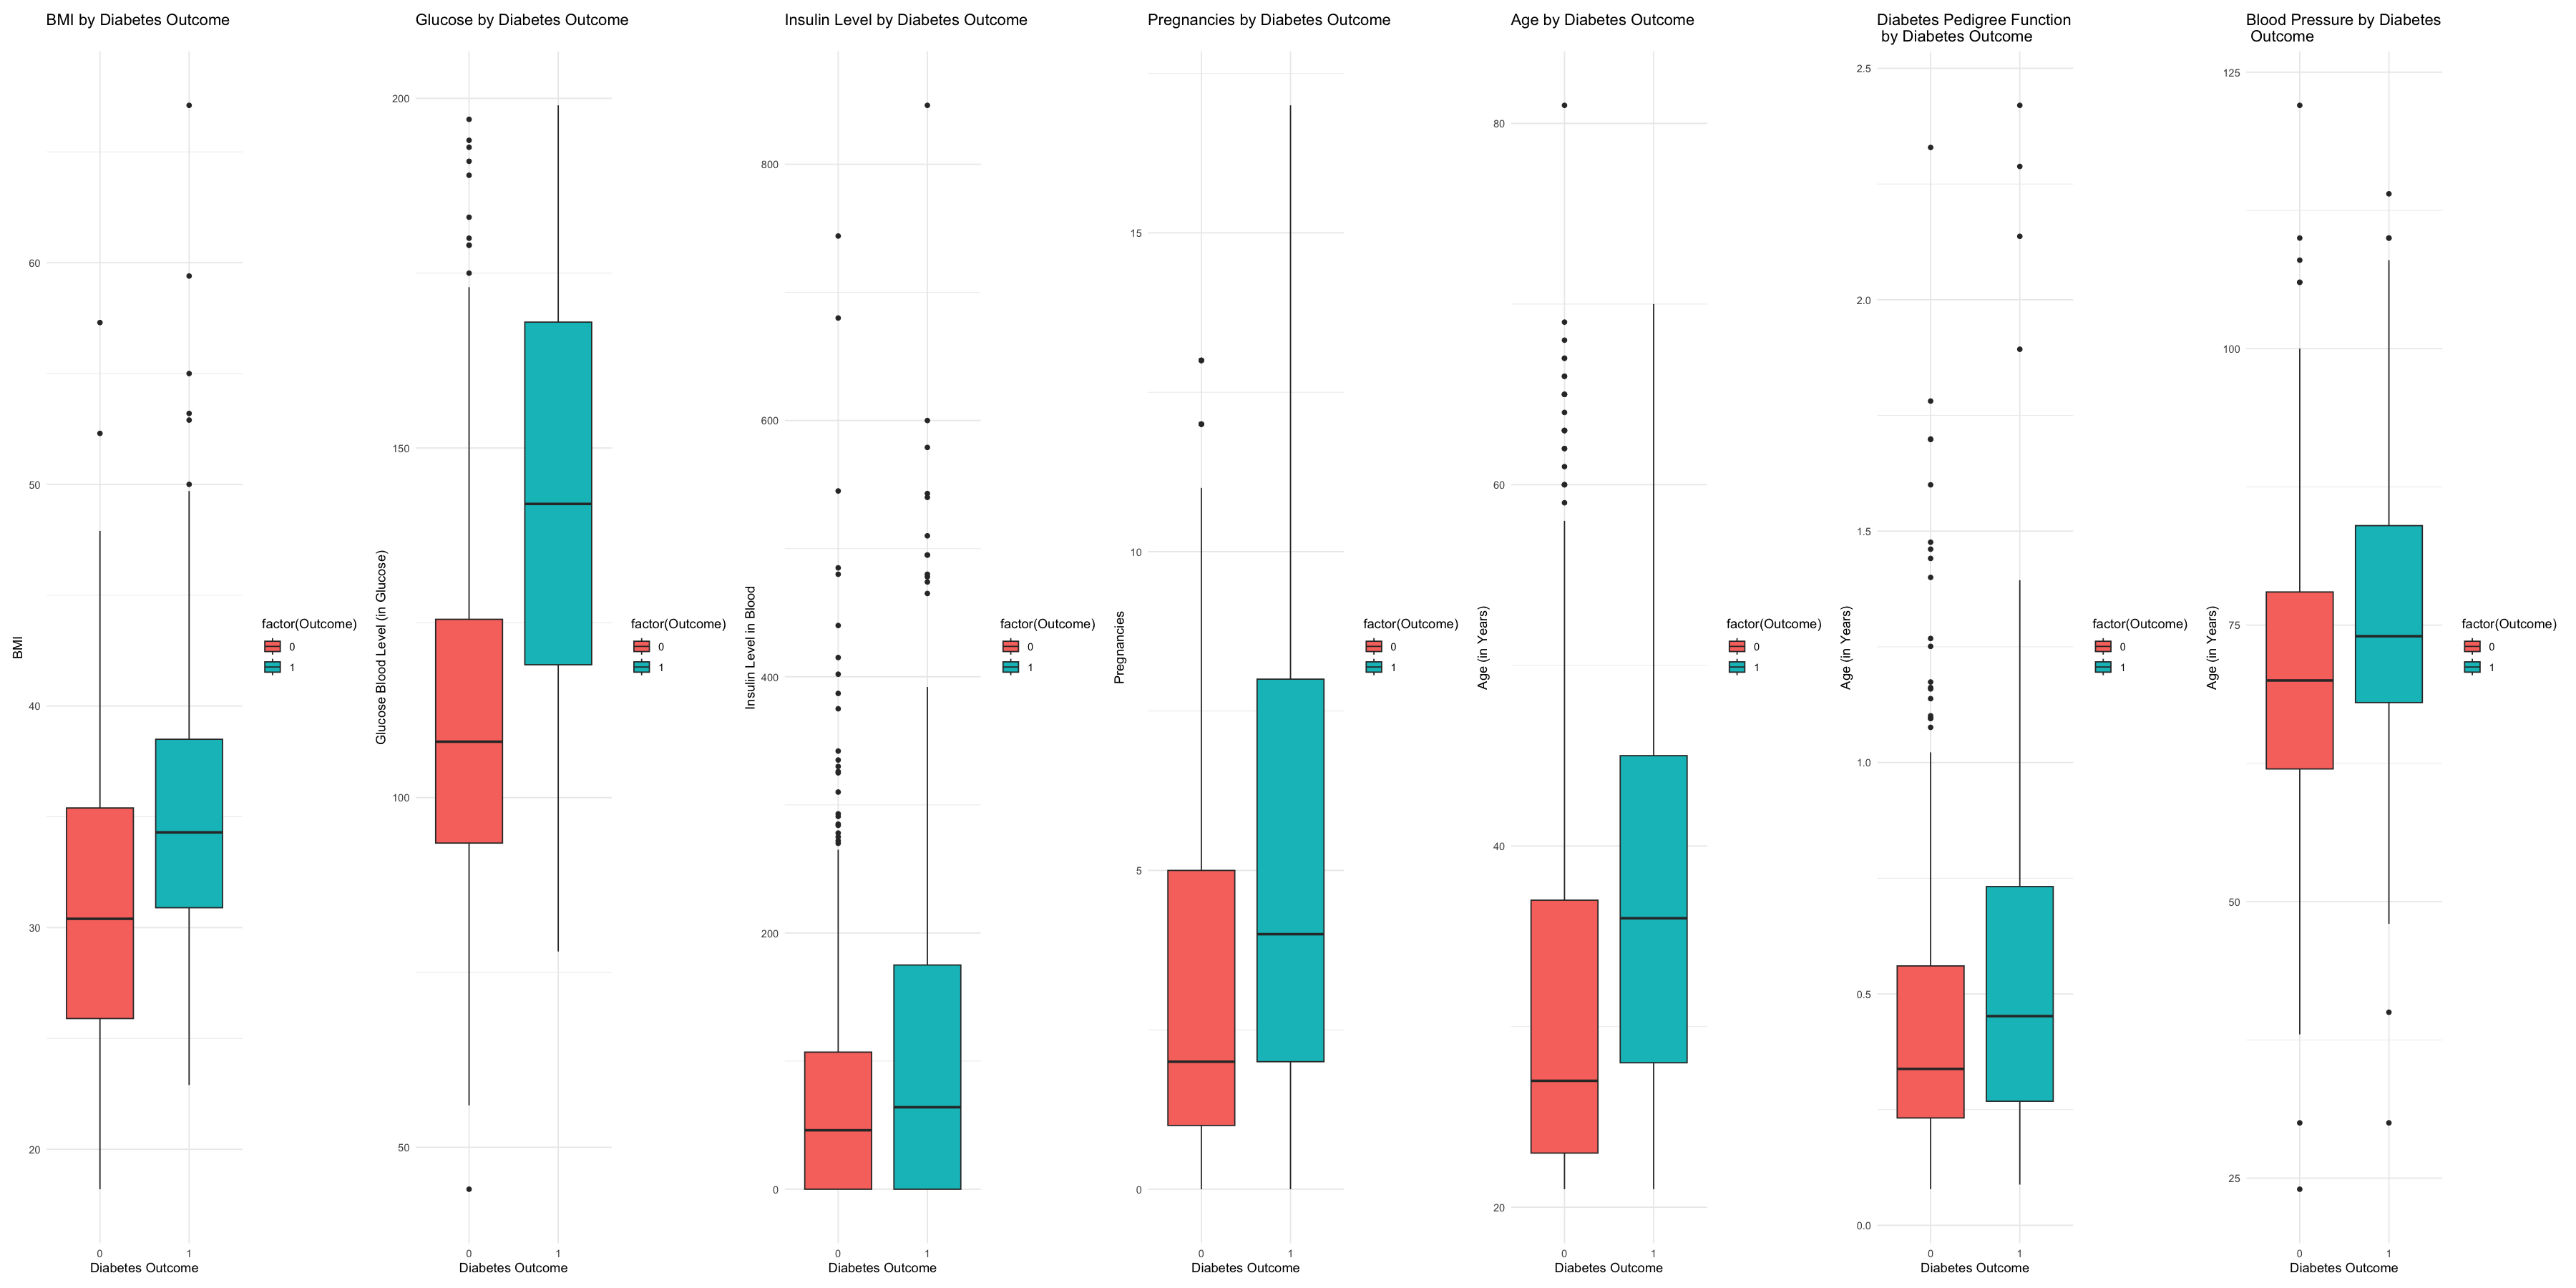

In [49]:
# Main developer: Ethan
# Contributor: Andrea, Aarya, Preran

# set the dimensions of the plot
options(repr.plot.width = 30, repr.plot.height = 15)

plot1 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = BMI, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "BMI by Diabetes Outcome", x = "Diabetes Outcome", y = "BMI") +
  theme_minimal()

plot2 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = Glucose, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Glucose by Diabetes Outcome", x = "Diabetes Outcome", y = "Glucose Blood Level (in Glucose)") +
  theme_minimal()

plot3 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = Insulin, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Insulin Level by Diabetes Outcome", x = "Diabetes Outcome", y = "Insulin Level in Blood") +
  theme_minimal()

plot4 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = Pregnancies, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Pregnancies by Diabetes Outcome", x = "Diabetes Outcome", y = "Pregnancies") +
  theme_minimal()

plot5 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = Age, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Age by Diabetes Outcome", x = "Diabetes Outcome", y = "Age (in Years)") +
  theme_minimal()

plot6 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = DiabetesPedigreeFunction, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Diabetes Pedigree Function \n by Diabetes Outcome", x = "Diabetes Outcome", y = "Age (in Years)") +
  theme_minimal()

plot7 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = BloodPressure, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Blood Pressure by Diabetes \n Outcome", x = "Diabetes Outcome", y = "Age (in Years)") +
  theme_minimal()

# Combine plots in one row
combined_plot <- plot1 + plot2 + plot3 + plot4 + plot5 + plot6 + plot7 + plot_layout(nrow = 1)

# Display combined plot
combined_plot

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


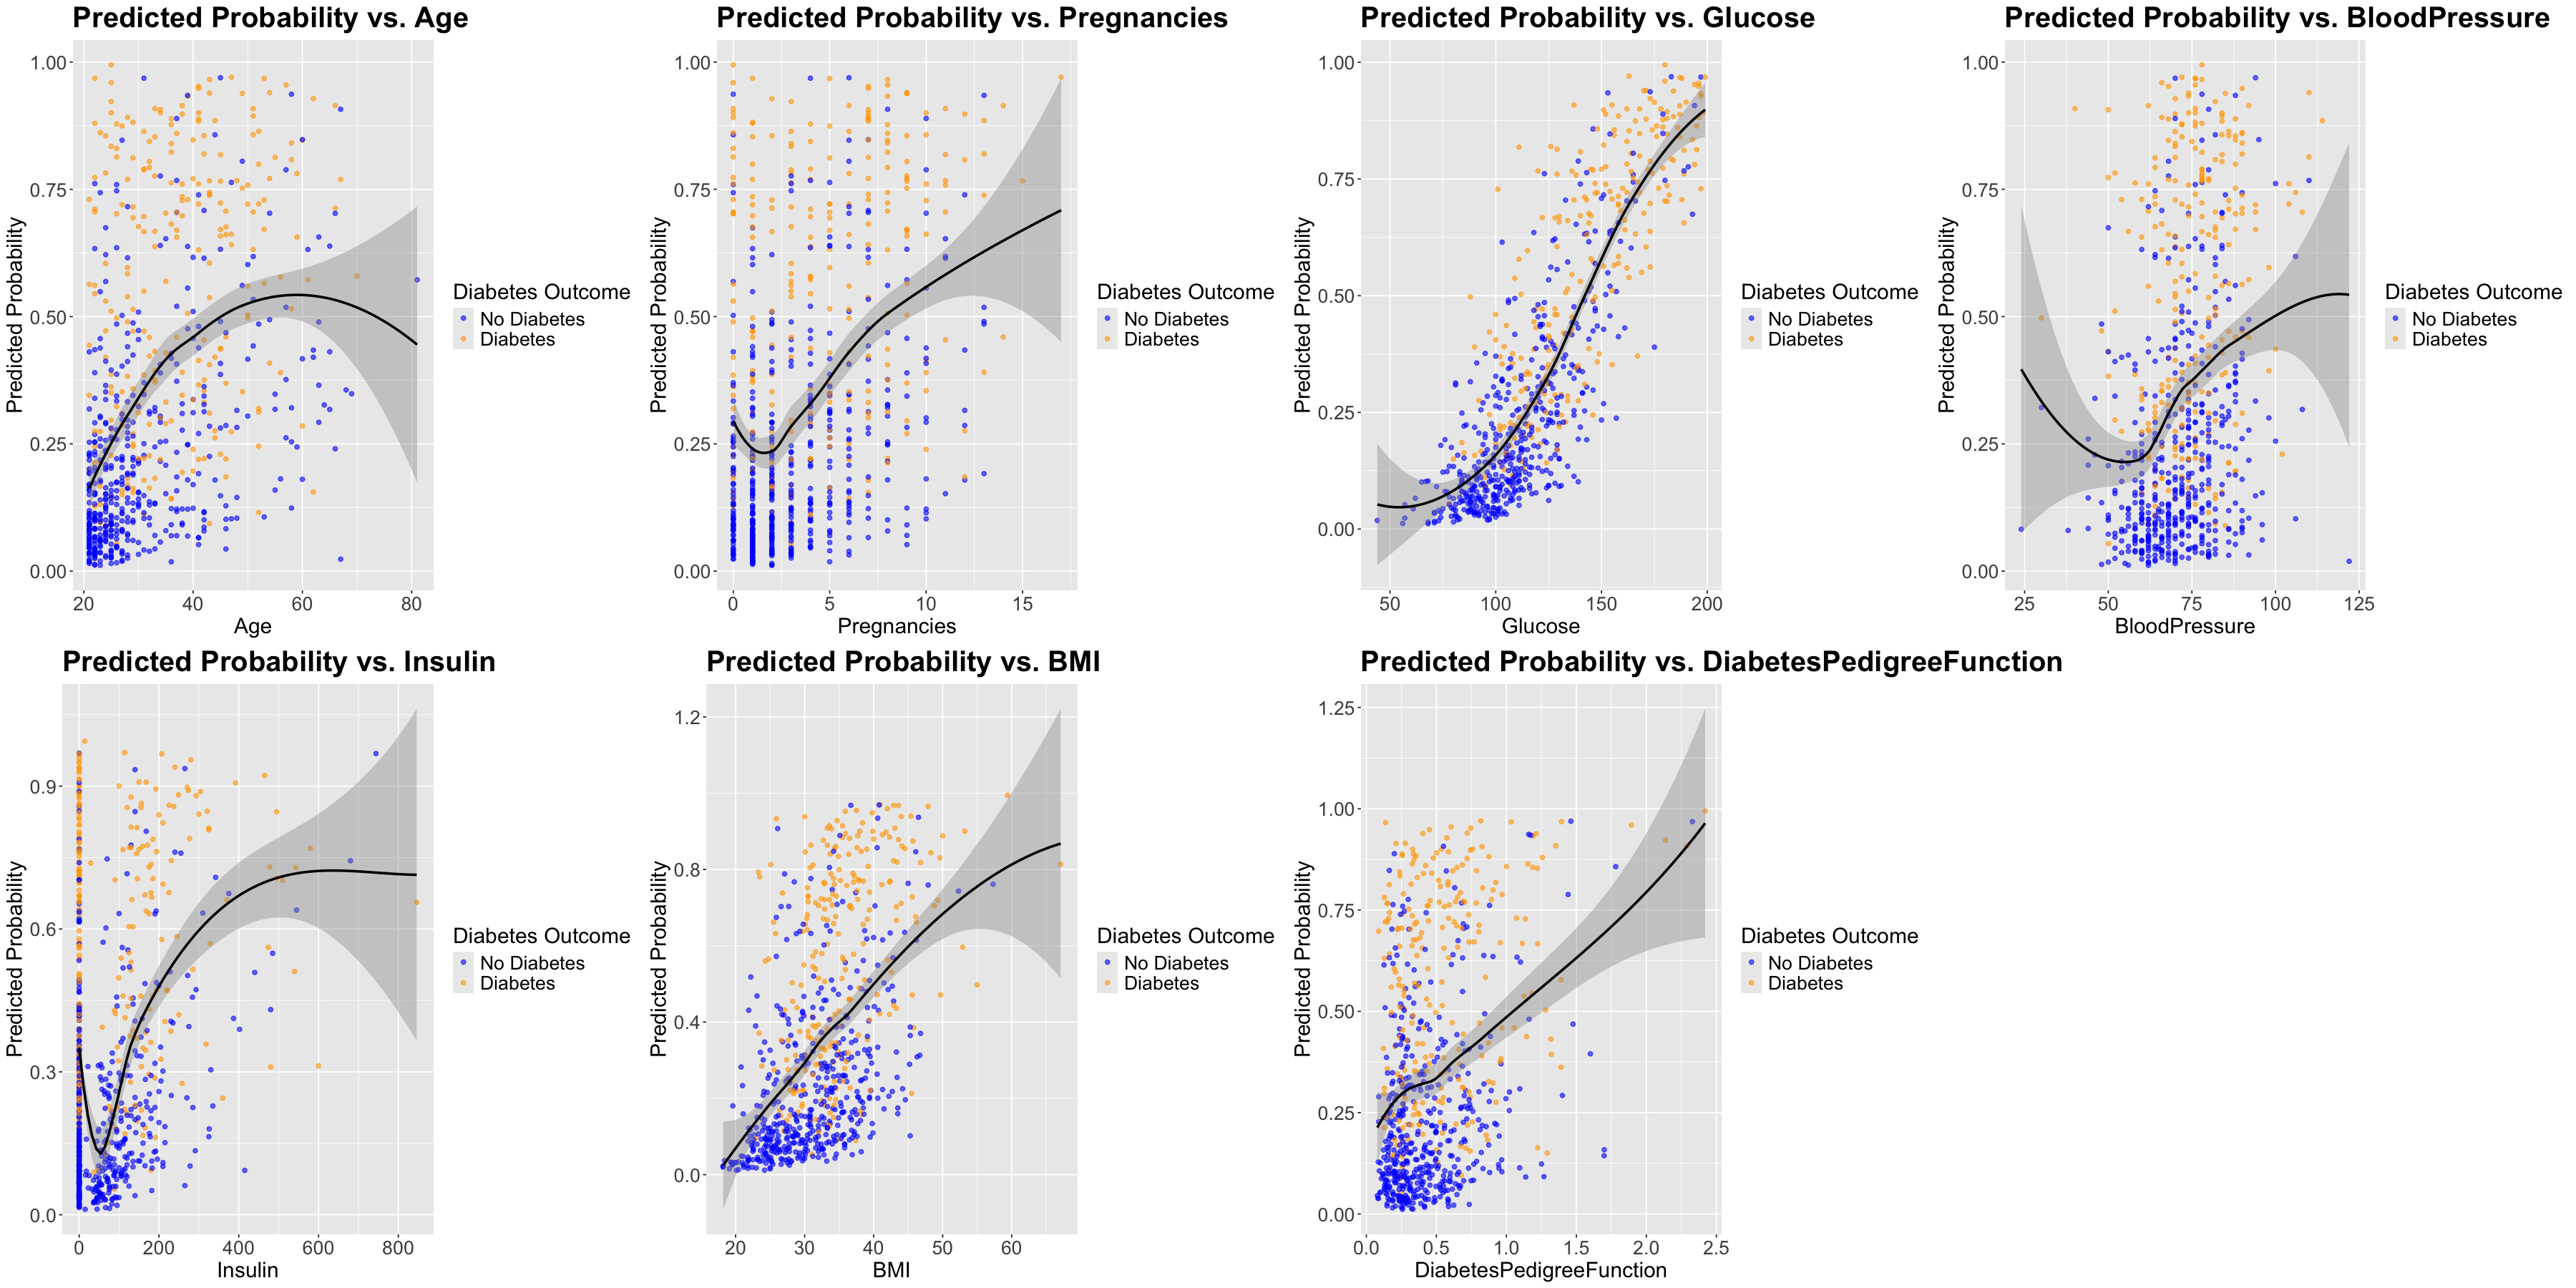

In [51]:
model <- glm(Outcome ~ Age + Pregnancies + Glucose + BloodPressure + Insulin + BMI + DiabetesPedigreeFunction, data = diabetes_data_clean, family = "binomial")
diabetes_data_clean$predicted_prob <- predict(model, type = "response")

# variables to plot
variables <- c("Age", "Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction")

# list to store the plots
plots <- list()

# loop and generate a plot for each variable
for (var in variables) {
  plot <- ggplot(diabetes_data_clean, aes_string(x = var, y = "predicted_prob")) +
    geom_point(aes(color = as.factor(Outcome)), alpha = 0.6) +
    geom_smooth(method = "loess", color = "black") +
    theme(plot.title = element_text(size = 24, face = "bold"),
          axis.title = element_text(size = 18),
          axis.text = element_text(size = 16),
          legend.title = element_text(size = 18),
          legend.text = element_text(size = 16)) +
    scale_color_manual(values = c("blue", "orange"),
                       labels = c("No Diabetes", "Diabetes"),
                       name = "Diabetes Outcome") +
    labs(title = paste("Predicted Probability vs.", var),
         x = var, y = "Predicted Probability")
  
  # Add the plot to the list
  plots[[var]] <- plot
}

# plot
do.call(grid.arrange, c(plots, nrow = 2))